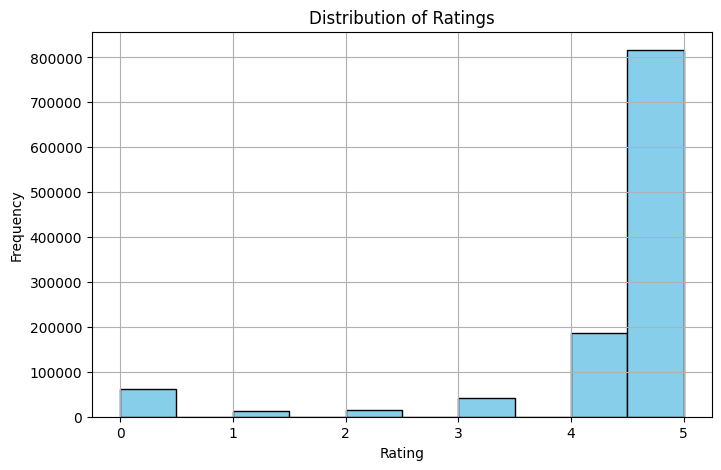

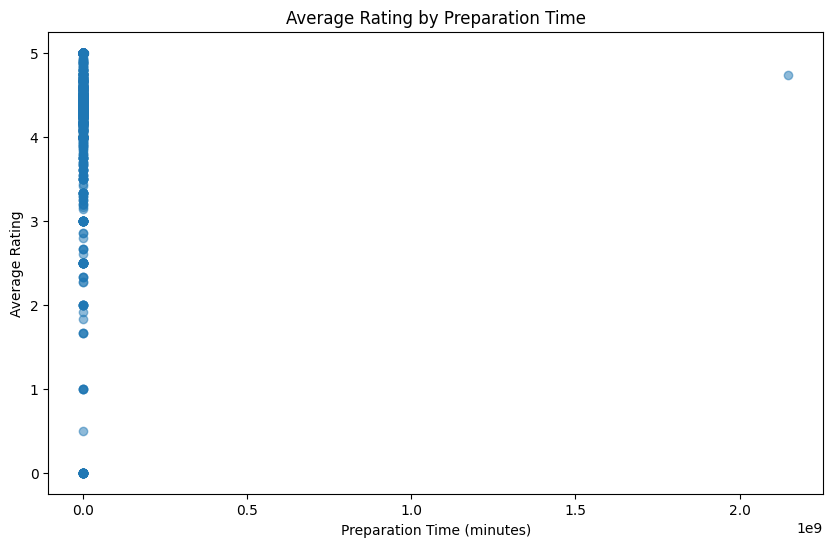

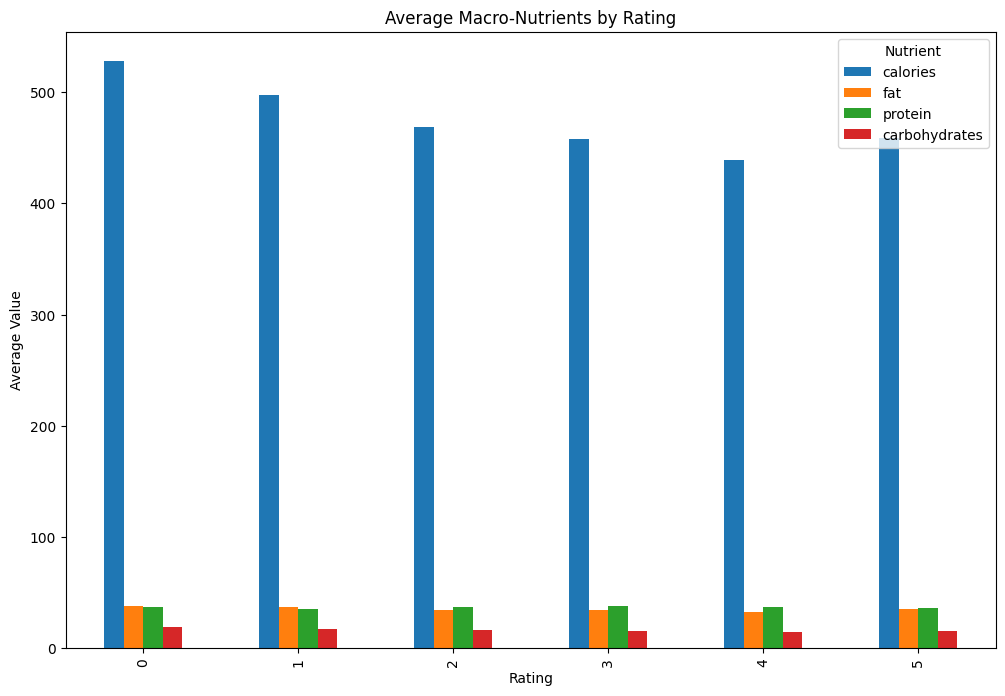

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
recipes_df = pd.read_csv('archive/RAW_recipes.csv')
interactions_df = pd.read_csv('archive/RAW_interactions.csv')

# Merge datasets using the correct columns for recipe IDs
merged_df = interactions_df.merge(recipes_df, left_on='recipe_id', right_on='id', how='inner')

# 1. Distribution of Ratings
plt.figure(figsize=(8, 5))
interactions_df['rating'].hist(bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# 2. Average Rating by Prep Time
merged_df['minutes'] = pd.to_numeric(merged_df['minutes'], errors='coerce')
avg_rating_by_time = merged_df.groupby('minutes')['rating'].mean()
plt.figure(figsize=(10, 6))
plt.scatter(avg_rating_by_time.index, avg_rating_by_time.values, alpha=0.5)
plt.title('Average Rating by Preparation Time')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Average Rating')
plt.show()

# 3. Macro-Nutrient Breakdown
# Nutrition column seems to hold macro-nutrient data in a string format (e.g., "[calories, fat, ...]")
merged_df['nutrition'] = merged_df['nutrition'].str.strip('[]').str.split(',').apply(lambda x: [float(i) for i in x] if isinstance(x, list) else None)
merged_df[['calories', 'fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']] = pd.DataFrame(merged_df['nutrition'].tolist(), index=merged_df.index)

# Average nutrients per rating
avg_nutrients = merged_df.groupby('rating')[['calories', 'fat', 'protein', 'carbohydrates']].mean()
avg_nutrients.plot(kind='bar', figsize=(12, 8))
plt.title('Average Macro-Nutrients by Rating')
plt.ylabel('Average Value')
plt.xlabel('Rating')
plt.legend(title='Nutrient')
plt.show()

Correlation of nutrients with ratings:
rating           1.000000
sodium          -0.004107
protein         -0.004564
fat             -0.006282
saturated_fat   -0.006607
sugar           -0.010826
carbohydrates   -0.012766
calories        -0.012785
Name: rating, dtype: float64


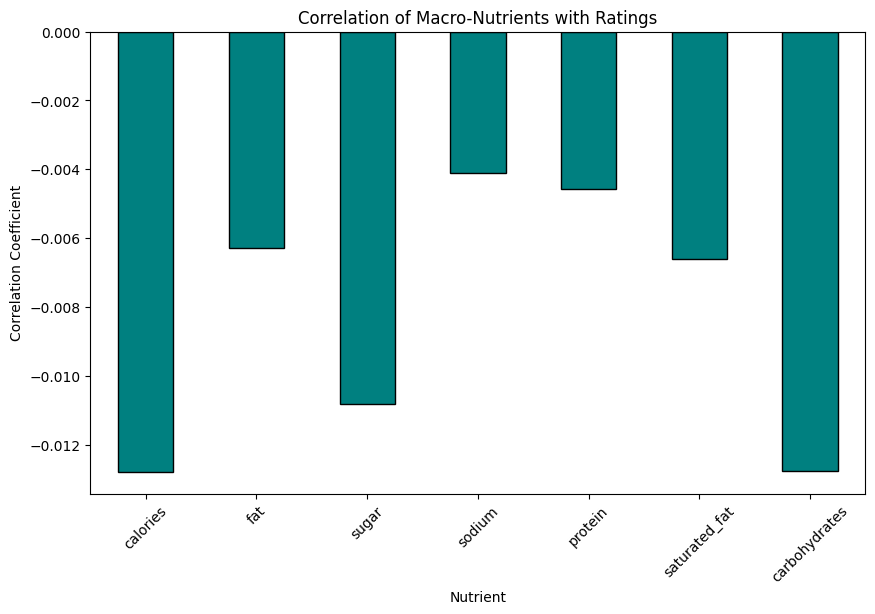

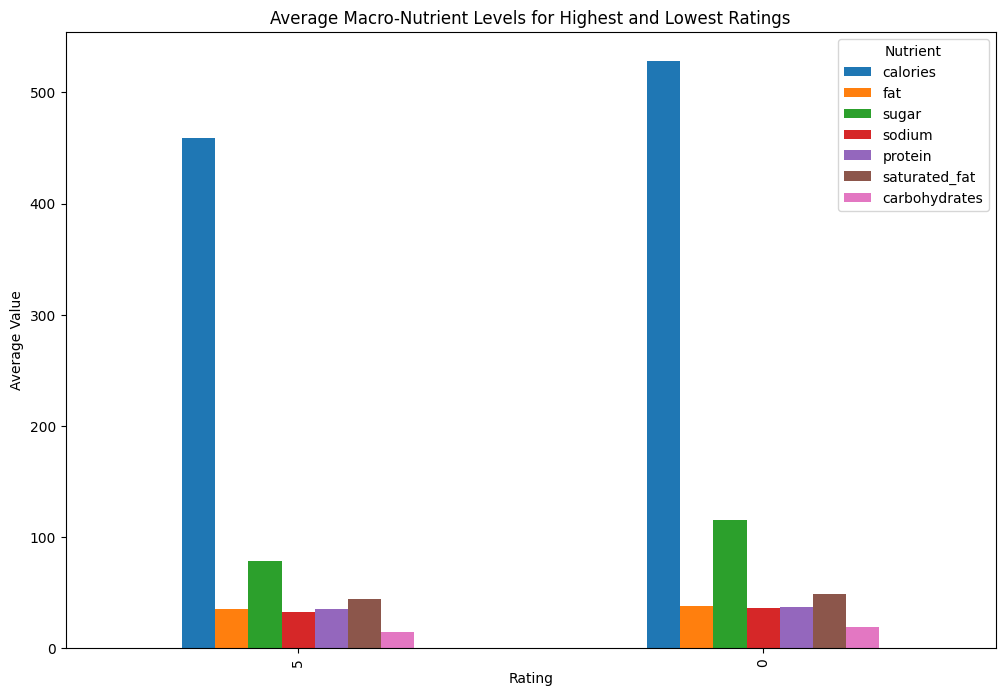

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


# Merge datasets using the correct columns for recipe IDs
merged_df = interactions_df.merge(recipes_df, left_on='recipe_id', right_on='id', how='inner')

# Parse the nutrition column into separate macro-nutrients
merged_df['nutrition'] = merged_df['nutrition'].str.strip('[]').str.split(',').apply(lambda x: [float(i) for i in x] if isinstance(x, list) else None)
merged_df[['calories', 'fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']] = pd.DataFrame(merged_df['nutrition'].tolist(), index=merged_df.index)

# Calculate correlation of nutrients with ratings
nutrient_columns = ['calories', 'fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']
correlations = merged_df[nutrient_columns + ['rating']].corr()['rating'].sort_values(ascending=False)

# Display correlation results
print("Correlation of nutrients with ratings:")
print(correlations)

# Plot the correlation values
plt.figure(figsize=(10, 6))
correlations[nutrient_columns].plot(kind='bar', color='teal', edgecolor='black')
plt.title('Correlation of Macro-Nutrients with Ratings')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Nutrient')
plt.xticks(rotation=45)
plt.show()

# Group by rating and calculate average nutrient levels
avg_nutrients_by_rating = merged_df.groupby('rating')[nutrient_columns].mean()

# Plot average nutrient levels for the top and bottom ratings
avg_nutrients_by_rating.loc[[merged_df['rating'].max(), merged_df['rating'].min()]].plot(kind='bar', figsize=(12, 8))
plt.title('Average Macro-Nutrient Levels for Highest and Lowest Ratings')
plt.ylabel('Average Value')
plt.xlabel('Rating')
plt.legend(title='Nutrient')
plt.show()

Correlation of nutrients with ratings (excluding calories):
rating           1.000000
sodium          -0.004107
protein         -0.004564
fat             -0.006282
saturated_fat   -0.006607
sugar           -0.010826
carbohydrates   -0.012766
Name: rating, dtype: float64


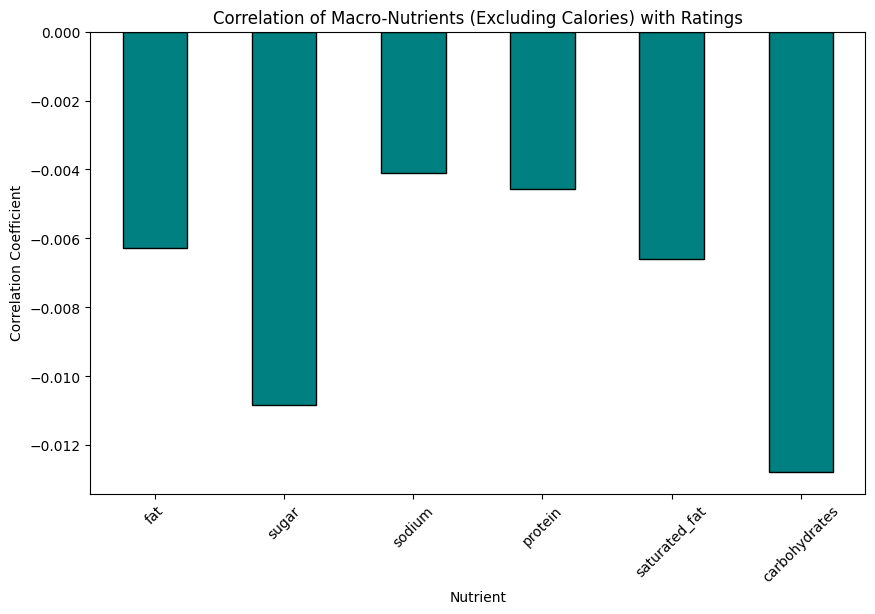


Average ratings by food type:
main_type
Throw the ultimate fiesta with this sopaipillas recipe from Food.com.    5.000000
healthy                                                                  5.000000
dietary                                                                  4.704918
low-protein                                                              4.666667
occasion                                                                 4.529412
danish                                                                   4.513026
                                                                         4.506354
chicken                                                                  4.500000
bacon                                                                    4.482645
15-minutes-or-less                                                       4.467797
ham                                                                      4.457670
30-minutes-or-less                                       

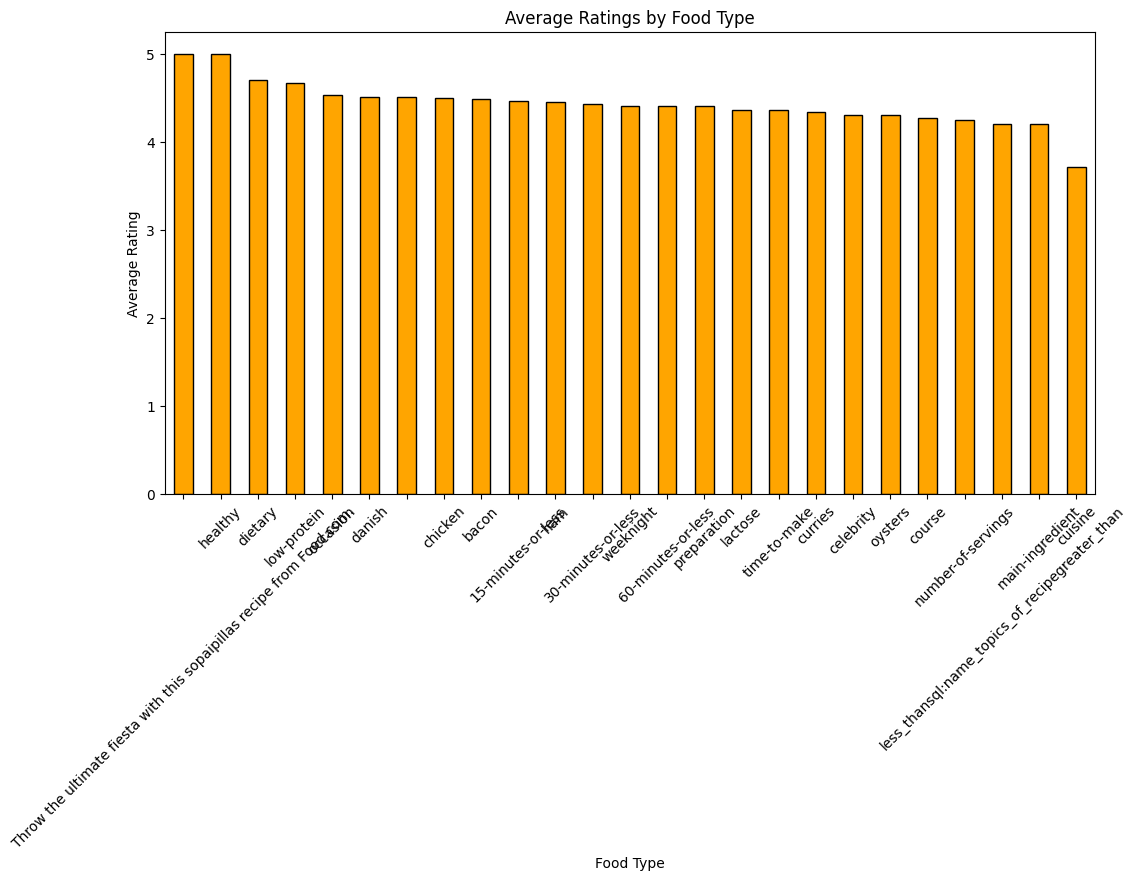

In [3]:
import pandas as pd
import matplotlib.pyplot as plt



# Merge datasets using the correct columns for recipe IDs
merged_df = interactions_df.merge(recipes_df, left_on='recipe_id', right_on='id', how='inner')

# Parse the nutrition column into separate macro-nutrients
merged_df['nutrition'] = merged_df['nutrition'].str.strip('[]').str.split(',').apply(lambda x: [float(i) for i in x] if isinstance(x, list) else None)
merged_df[['fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']] = pd.DataFrame(
    merged_df['nutrition'].apply(lambda x: x[1:7] if x else [None]*6).tolist(), index=merged_df.index
)

# Correlation analysis (excluding calories)
nutrient_columns = ['fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']
correlations = merged_df[nutrient_columns + ['rating']].corr()['rating'].sort_values(ascending=False)

# Display correlation results
print("Correlation of nutrients with ratings (excluding calories):")
print(correlations)

# Plot the correlation values
plt.figure(figsize=(10, 6))
correlations[nutrient_columns].plot(kind='bar', color='teal', edgecolor='black')
plt.title('Correlation of Macro-Nutrients (Excluding Calories) with Ratings')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Nutrient')
plt.xticks(rotation=45)
plt.show()

# Analyze the relationship between food type (tags) and ratings
# Extract main food type tags (e.g., dessert, savory)
merged_df['tags'] = merged_df['tags'].str.strip('[]').str.replace("'", "").str.split(',')
merged_df['main_type'] = merged_df['tags'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else 'Unknown')

# Group by main food type and calculate average rating
avg_rating_by_type = merged_df.groupby('main_type')['rating'].mean().sort_values(ascending=False)

# Display average ratings by food type
print("\nAverage ratings by food type:")
print(avg_rating_by_type)

# Plot the average ratings by food type
plt.figure(figsize=(12, 6))
avg_rating_by_type.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Average Ratings by Food Type')
plt.ylabel('Average Rating')
plt.xlabel('Food Type')
plt.xticks(rotation=45)
plt.show()

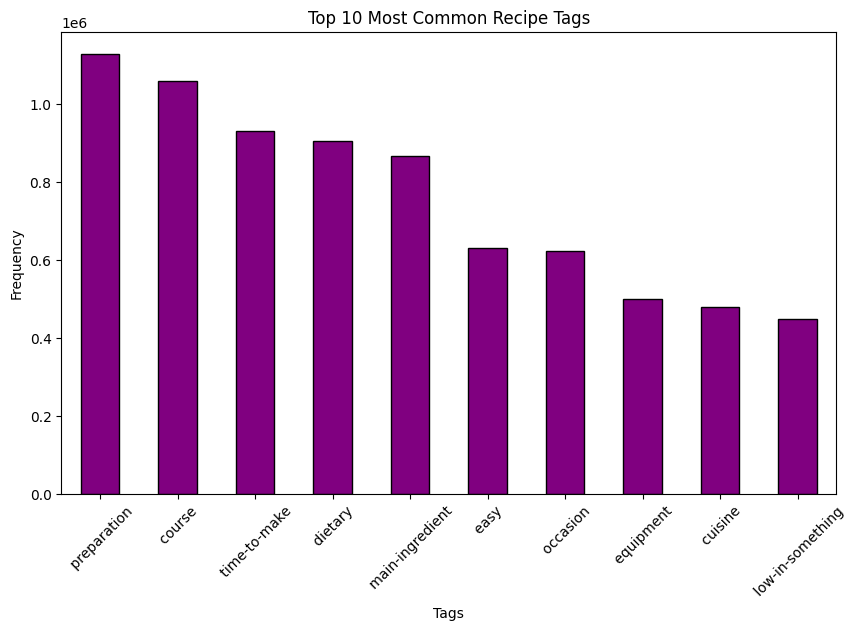

In [4]:
# Flatten the tags into a single list and count occurrences
all_tags = merged_df['tags'].explode()
tag_counts = all_tags.value_counts().head(10)  # Top 10 most frequent tags

# Plot the most common tags
plt.figure(figsize=(10, 6))
tag_counts.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Top 10 Most Common Recipe Tags')
plt.ylabel('Frequency')
plt.xlabel('Tags')
plt.xticks(rotation=45)
plt.show()

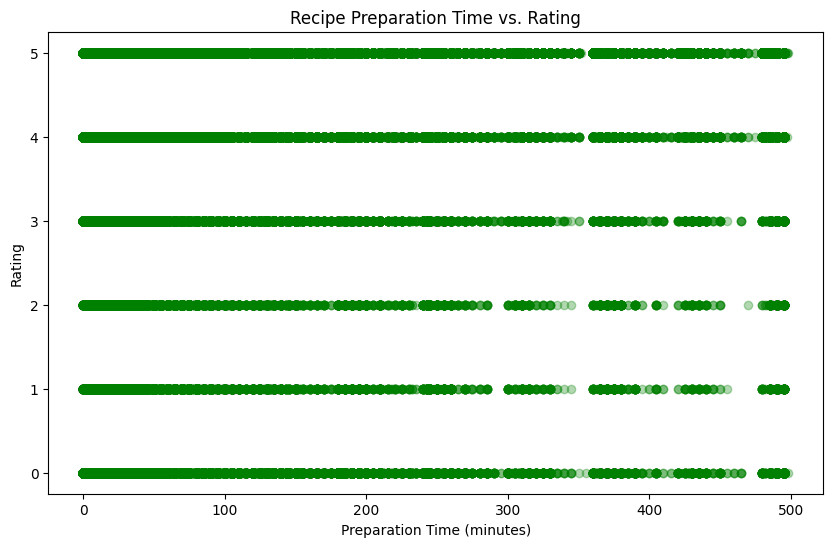

In [5]:
# Clean up `minutes` and remove outliers (e.g., extremely long durations)
merged_df['minutes'] = pd.to_numeric(merged_df['minutes'], errors='coerce')
filtered_df = merged_df[merged_df['minutes'] < 500]  # Remove extreme outliers

# Plot preparation time vs. average rating
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['minutes'], filtered_df['rating'], alpha=0.3, color='green')
plt.title('Recipe Preparation Time vs. Rating')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Rating')
plt.show()

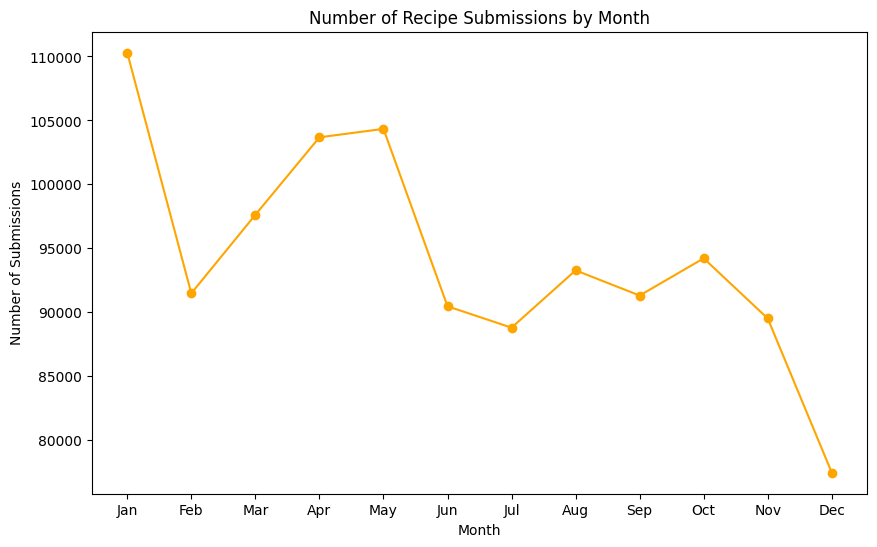

In [8]:
# Extract month from the `submitted` column
merged_df['submitted'] = pd.to_datetime(merged_df['submitted'], errors='coerce')
merged_df['month'] = merged_df['submitted'].dt.month

# Count the number of recipes submitted each month
monthly_counts = merged_df['month'].value_counts().sort_index()

# Plot submissions by month
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='line', marker='o', color='orange')
plt.title('Number of Recipe Submissions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Submissions')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

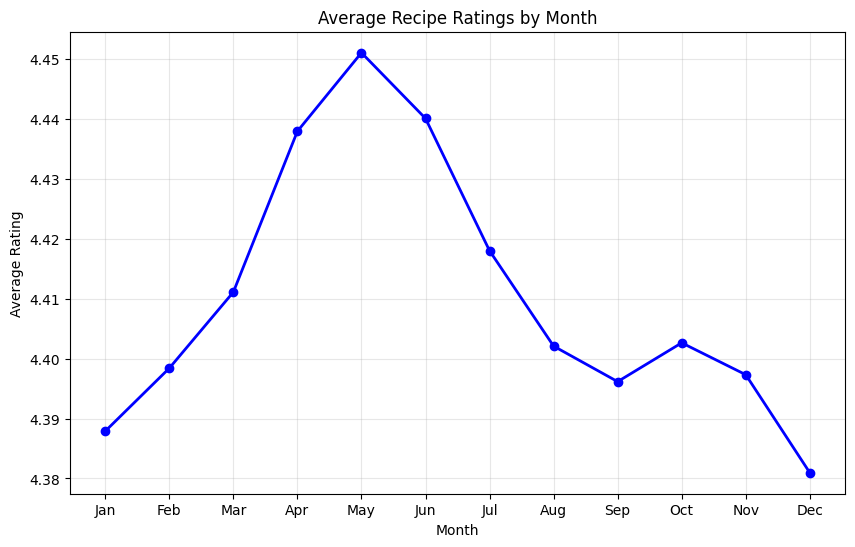

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
recipes_df = pd.read_csv('RAW_recipes.csv')
interactions_df = pd.read_csv('RAW_interactions.csv')

# Merge datasets using the correct columns for recipe IDs
merged_df = interactions_df.merge(recipes_df, left_on='recipe_id', right_on='id', how='inner')

# Extract month from the `submitted` column
merged_df['submitted'] = pd.to_datetime(merged_df['submitted'], errors='coerce')
merged_df['month'] = merged_df['submitted'].dt.month

# Calculate average rating for each month
monthly_avg_ratings = merged_df.groupby('month')['rating'].mean()

# Plot average ratings by month
plt.figure(figsize=(10, 6))
monthly_avg_ratings.plot(kind='line', marker='o', color='blue', linewidth=2)
plt.title('Average Recipe Ratings by Month')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(alpha=0.3)
plt.show()

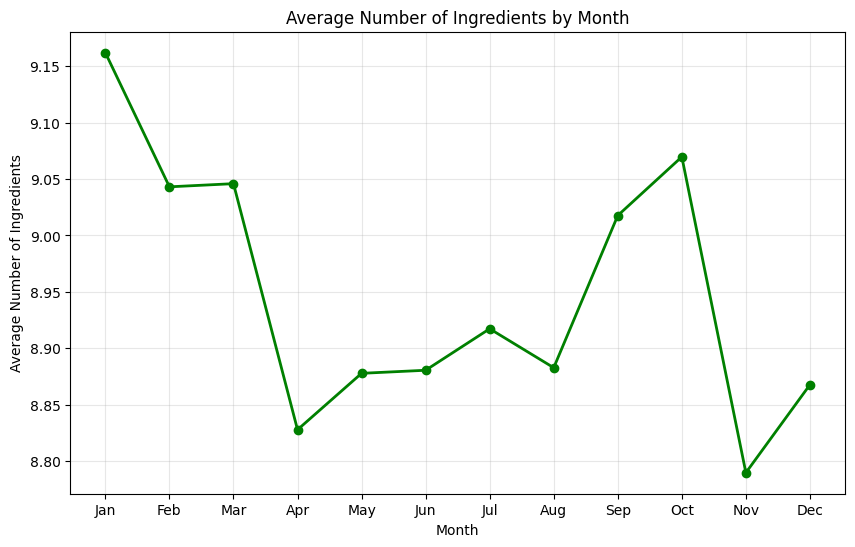

In [10]:
# Calculate average number of ingredients per month
avg_ingredients_by_month = merged_df.groupby('month')['n_ingredients'].mean()

# Plot average number of ingredients by month
plt.figure(figsize=(10, 6))
avg_ingredients_by_month.plot(kind='line', marker='o', color='green', linewidth=2)
plt.title('Average Number of Ingredients by Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Ingredients')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(alpha=0.3)
plt.show()

Note: you may need to restart the kernel to use updated packages.


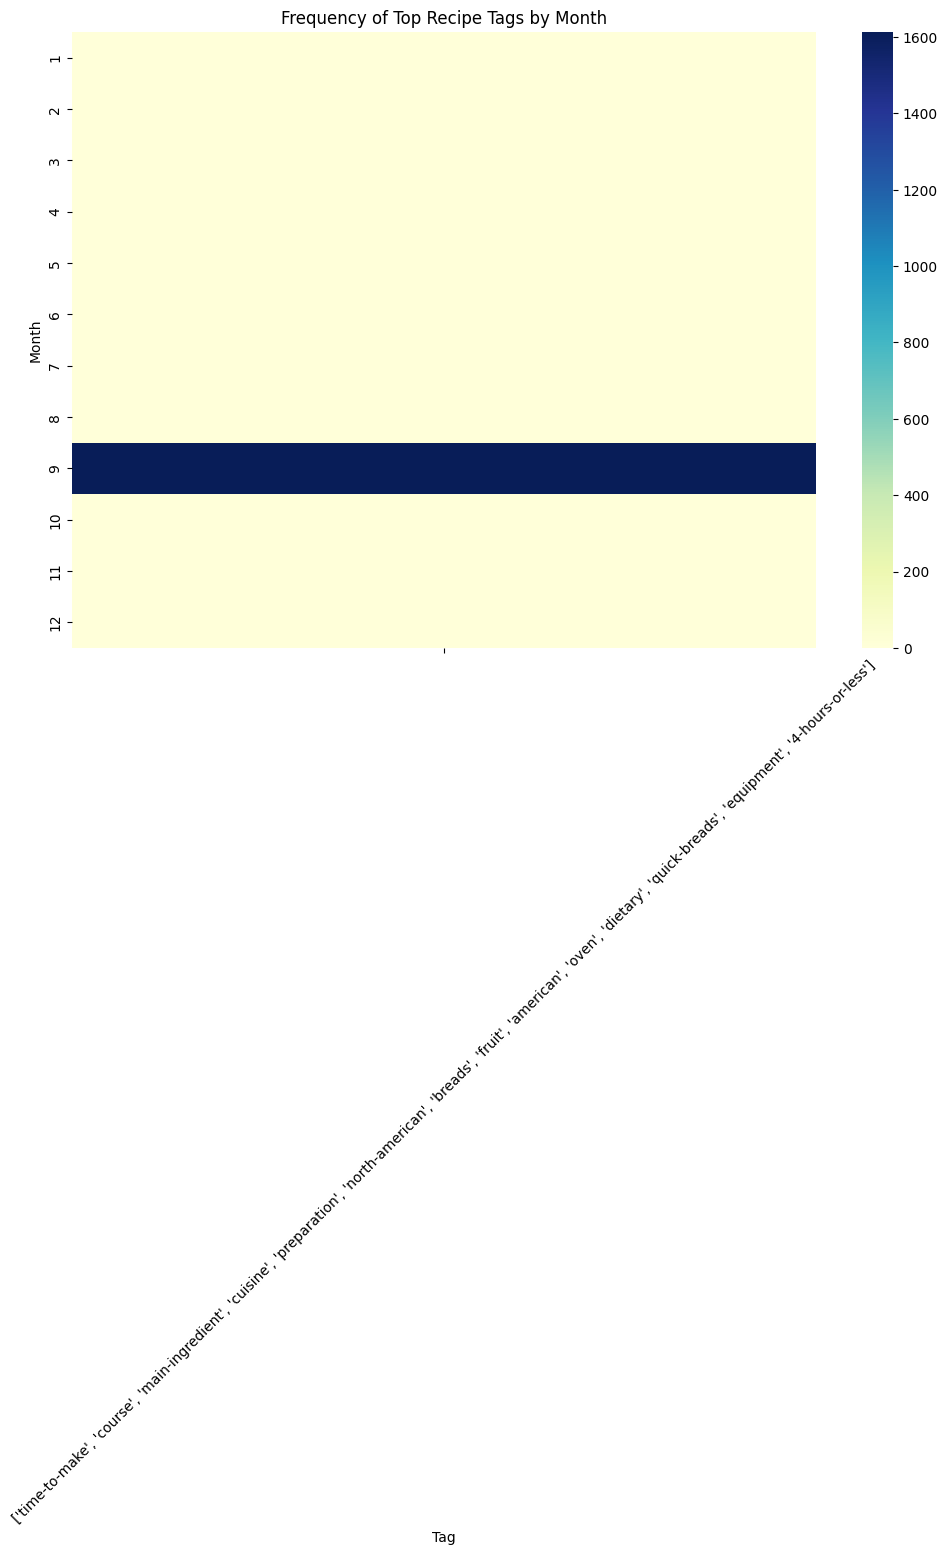

In [13]:
%pip install seaborn
import seaborn as sns

# Count the top tags for each month
tag_counts_by_month = merged_df.explode('tags').groupby(['month', 'tags']).size().unstack(fill_value=0)

# Select top tags across all months
top_tags = tag_counts_by_month.sum().sort_values(ascending=False).head(10).index
filtered_tag_counts = tag_counts_by_month[top_tags]

# Create a heatmap for the most common tags by month
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_tag_counts, cmap='YlGnBu', annot=False, cbar=True)
plt.title('Frequency of Top Recipe Tags by Month')
plt.xlabel('Tag')
plt.ylabel('Month')
plt.xticks(rotation=45)
plt.show()

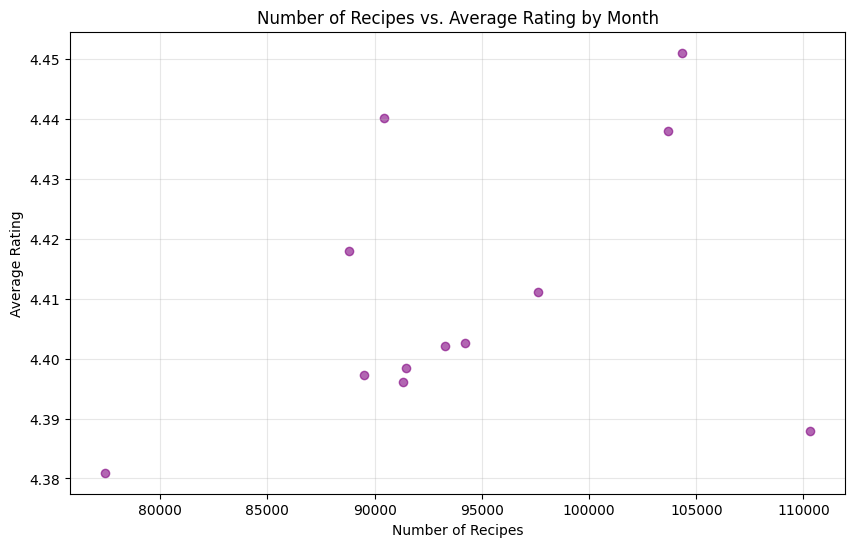

In [14]:
# Calculate number of submissions and average rating by month
monthly_data = merged_df.groupby('month').agg({
    'rating': 'mean',
    'id': 'count'  # Count number of recipes (id)
}).rename(columns={'id': 'num_recipes'})

# Plot number of recipes vs. average rating
plt.figure(figsize=(10, 6))
plt.scatter(monthly_data['num_recipes'], monthly_data['rating'], alpha=0.6, color='purple')
plt.title('Number of Recipes vs. Average Rating by Month')
plt.xlabel('Number of Recipes')
plt.ylabel('Average Rating')
plt.grid(alpha=0.3)
plt.show()

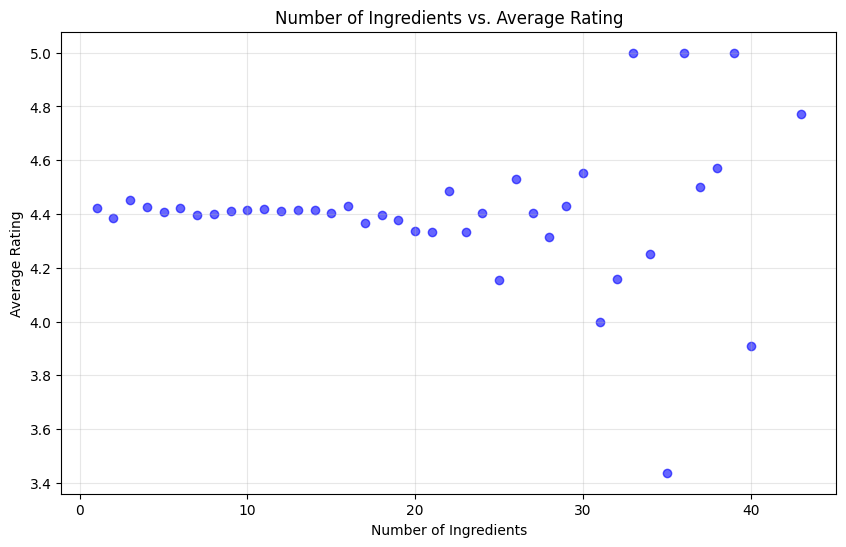

In [15]:
# Calculate average rating by number of ingredients
avg_rating_by_ingredients = merged_df.groupby('n_ingredients')['rating'].mean()

# Plot ingredients count vs. ratings
plt.figure(figsize=(10, 6))
plt.scatter(avg_rating_by_ingredients.index, avg_rating_by_ingredients.values, alpha=0.6, color='blue')
plt.title('Number of Ingredients vs. Average Rating')
plt.xlabel('Number of Ingredients')
plt.ylabel('Average Rating')
plt.grid(alpha=0.3)
plt.show()

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

# Preprocess tags into a list of lists
merged_df['tags'] = merged_df['tags'].str.strip('[]').str.replace("'", "").str.split(', ')
tag_lists = merged_df['tags'].dropna()

# Count co-occurrences of tag pairs
tag_pairs = [tuple(sorted(pair)) for tags in tag_lists for pair in combinations(tags, 2)]
tag_cooccurrence = Counter(tag_pairs)

# Create a graph
G = nx.Graph()

# Add edges to the graph
for (tag1, tag2), weight in tag_cooccurrence.items():
    if weight > 50:  # Filter for meaningful relationships (e.g., pairs with >50 occurrences)
        G.add_edge(tag1, tag2, weight=weight)

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5)  # Layout for better spacing
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

plt.title('Tag Co-Occurrence Network')
plt.axis('off')
plt.show()

AttributeError: Can only use .str accessor with string values!

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the ingredient text data
recipes_df['ingredients'] = recipes_df['ingredients'].str.strip('[]').str.replace("'", "").str.join(', ')
ingredients_corpus = recipes_df['ingredients'].dropna()

# Vectorize ingredients using TF-IDF
vectorizer = TfidfVectorizer(max_features=500, stop_words='english')
ingredient_vectors = vectorizer.fit_transform(ingredients_corpus)

# Apply K-Means clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
recipes_df['cluster'] = kmeans.fit_predict(ingredient_vectors)

# Visualize cluster sizes
cluster_counts = recipes_df['cluster'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Number of Recipes in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Recipes')
plt.show()

# Inspect top terms in each cluster
top_terms = []
for i in range(num_clusters):
    terms = vectorizer.get_feature_names_out()
    centroid = kmeans.cluster_centers_[i]
    top_terms.append([terms[index] for index in centroid.argsort()[-10:]])

# Print top terms for each cluster
for i, terms in enumerate(top_terms):
    print(f"Cluster {i}: {', '.join(terms)}")

ValueError: empty vocabulary; perhaps the documents only contain stop words